<a href="https://colab.research.google.com/github/vanecornejo/EDP-II/blob/main/M%C3%A9todo%20de%20M%C3%ADnimos%20Cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 5.8 - Método de Mínimos Cuadrados**

Queremos resolver el problema diferencial:

$$ u'' + u = x, \qquad u(0)=0,\quad u'(0)=2 $$

Buscamos una solución aproximada cúbica:

$$ u_N(x)= \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3 $$

donde las condiciones iniciales fijan:

$$ \alpha_0=0,\qquad \alpha_1=2 $$

Los coeficientes desconocidos serán:

$$ \alpha_2 = a,\qquad \alpha_3 = b $$

Usamos el **método de mínimos cuadrados**, minimizando

$$ J(a,b)=\int_0^1 (u_N''(x) + u_N(x) - x)^2\,dx $$

Luego comparamos con la solución exacta y calculamos el error máximo.


In [145]:
# Importamos librerías
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### **Solución exacta**

Primero resolvemos la ecuación diferencial:

$$ u'' + u = x $$

con condiciones iniciales:

$$ u(0)=0,\quad u'(0)=2 $$

In [146]:
x = sp.symbols('x')
u = sp.Function('u')

In [147]:
# Definimos la ecuación diferencial
ode = u(x).diff(x, 2) + u(x) - x

In [148]:
# La resolvemos con condiciones iniciales
sol = sp.dsolve(ode, ics={u(0):0, u(x).diff(x).subs(x,0):2})
sol

Eq(u(x), x + sin(x))

In [149]:
# Extraemos solo la parte funcional u(x)
u_exact = sol.rhs

# Convertimos a función numérica para graficar
u_exact_num = sp.lambdify(x, u_exact, "numpy")

### **Aproximación cúbica**

Planteamos:

$$ u_N(x)=0 + 2x + ax^2 + bx^3 $$

Calculamos el residuo:

$$ R(x)=u_N''(x)+u_N(x)-x $$

y luego aplicamos mínimos cuadrados.


In [150]:
# Definimos símbolos
a, b = sp.symbols('a b')

In [151]:
# Coeficientes por condiciones iniciales
alpha_0 = 0
alpha_1 = 2

In [152]:
# Aproximación cúbica
uN = alpha_0 + alpha_1*x + a*x**2 + b*x**3
uN

a*x**2 + b*x**3 + 2*x

El residuo del método es:

$$ R(x)=u_N''(x)+u_N(x)-x $$

Sobre este residuo aplicamos mínimos cuadrados.


In [153]:
# Calculamos segunda derivada
uN_2 = sp.diff(uN, x, 2)

In [154]:
# Residuo
R = uN_2 + uN - x
sp.simplify(R)

a*x**2 + 2*a + b*x**3 + 6*b*x + x

## Funcional de mínimos cuadrados

Minimizamos:
$$ J(a,b)=\int_0^1 R(x)^2\,dx $$

Luego resolvemos:
$$ \frac{\partial J}{\partial a}=0,\qquad \frac{\partial J}{\partial b}=0 $$


In [155]:
# Construimos el funcional J(a, b)
J = sp.integrate(R**2, (x, 0, 1))
J

83*a**2/15 + 49*a*b/3 + 5*a/2 + 509*b**2/35 + 22*b/5 + 1/3

In [156]:
# Derivadas parciales
dJa = sp.diff(J, a)
dJb = sp.diff(J, b)

In [157]:
# Resolvemos el sistema de ecuaciones normales
sol_ls = sp.solve([dJa, dJb], [a, b])
sol_ls

{a: -1335/86789, b: -24759/173578}

In [158]:
# Guardamos los valores obtenidos
a_val = sol_ls[a]
b_val = sol_ls[b]

print("a2 =", a_val)
print("a3 =", b_val)

a2 = -1335/86789
a3 = -24759/173578


Hacemos la gráfica de la solución exacta vs aproximación de mínimos cuadrados

Comparamos en el intervalo $[0,1]$


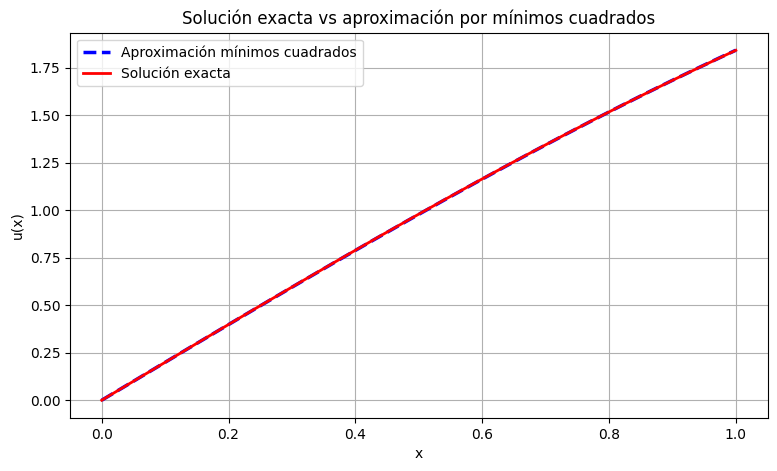

In [167]:
# Sustituimos coeficientes
uN_final = uN.subs({a:a_val, b:b_val})
uN_num = sp.lambdify(x, uN_final, "numpy")

# Mallado para la gráfica
xx = np.linspace(0, 1, 200)

plt.figure(figsize=(9,5))
plt.plot(xx, uN_num(xx), label="Aproximación mínimos cuadrados", linewidth=2.5,  linestyle='--', color="blue")
plt.plot(xx, u_exact_num(xx), label="Solución exacta", linewidth=2, color="red")

plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Solución exacta vs aproximación por mínimos cuadrados")
plt.grid(True)
plt.legend()
plt.show()


Calculamos el error absoluto
$$ E(x) = |u(x) - u_N(x)| $$

mostramos el error máximo y los graficamos.


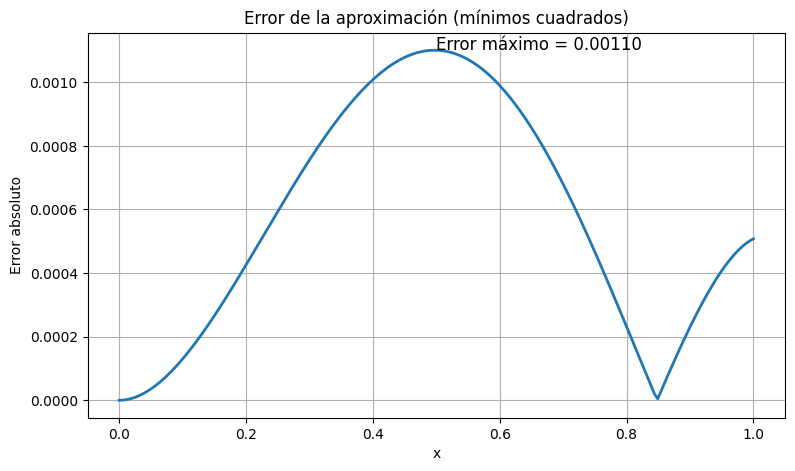

Error máximo = 0.0011010278759917003


In [160]:
# Error simbólico
error_expr = sp.Abs(u_exact - uN_final)

# Error numérico
error_num = sp.lambdify(x, error_expr, "numpy")
yy_error = error_num(xx)

error_max = np.max(yy_error)

# Gráfica
plt.figure(figsize=(9,5))
plt.plot(xx, yy_error, linewidth=2)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("Error absoluto")
plt.title("Error de la aproximación (mínimos cuadrados)")

plt.annotate(f"Error máximo = {error_max:.5f}",
             xy=(0.5, error_max),
             fontsize=12)

plt.show()

print("Error máximo =", error_max)
